<a href="https://colab.research.google.com/github/BenShieh233/NLP-Text-Mining/blob/main/IC7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic Modelling

In [22]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/INFOSYS765/yelp_review.csv")
df = df.iloc[:1000] # Keep only the first 1000 rows

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,stars,useful,text,funny,review_id,cool,date,user_id,business_id
0,4.0,0,First time waxing. I read all the other review...,0,V46usAbOSPIzurZy7DUU5A,0,2016-04-16 13:55:38,rD6noiuiMCcGuq6oPYFJdQ,b4NaB1u3AwgrhRMKsKgWsA
1,5.0,0,I love my manicure! Such an affordable place. ...,0,CpNSsju9NFc-Xrpf5Hfqhg,0,2020-01-18 05:32:54,tTsUSklzH1oxPp2usth84A,-otKp6RA94dfGsqa5jSDHQ
2,4.0,0,"Great food, fast service, they try to crank pe...",0,RP7A24xD14Cbegmr1AokNQ,0,2015-01-25 14:49:09,-cnIq2OmV8CleS4bLOvCxQ,EA10YCkaxzRoCEOB38xv1Q
3,1.0,0,Save your money and go across the street the f...,0,6a38lS1TjeWMqK-knuNAhA,0,2018-11-06 22:12:14,mzCkRflEka_vezCiBYYWGA,nkqaLepNTSrUYuZkzbBR5A
4,4.0,0,Oops...this was for the Main St location:\n\n-...,0,Q0QKTuceHzgmFeTtYSTzYg,0,2011-08-19 21:45:31,3zlK9eBVCpRWMPLjtAj6cQ,XtFhLvKV46H7a054X2_aFQ


### Text preprocessing

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords, lemmatize and drop words length < 2
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2]
    
    return text

In [24]:
df['processed_summary'] = df['text'].apply(lambda x: preprocess_text(x))

In [25]:
df

,stars,useful,text,funny,review_id,cool,date,user_id,business_id,processed_summary
0,4.0,0,First time waxing. I read all the other review...,0,V46usAbOSPIzurZy7DUU5A,0,2016-04-16 13:55:38,rD6noiuiMCcGuq6oPYFJdQ,b4NaB1u3AwgrhRMKsKgWsA,"[first, time, waxing, read, review, decided, t..."
1,5.0,0,I love my manicure! Such an affordable place. ...,0,CpNSsju9NFc-Xrpf5Hfqhg,0,2020-01-18 05:32:54,tTsUSklzH1oxPp2usth84A,-otKp6RA94dfGsqa5jSDHQ,"[love, manicure, affordable, place, manicurist..."
2,4.0,0,"Great food, fast service, they try to crank pe...",0,RP7A24xD14Cbegmr1AokNQ,0,2015-01-25 14:49:09,-cnIq2OmV8CleS4bLOvCxQ,EA10YCkaxzRoCEOB38xv1Q,"[great, food, fast, service, try, crank, peopl..."
3,1.0,0,Save your money and go across the street the f...,0,6a38lS1TjeWMqK-knuNAhA,0,2018-11-06 22:12:14,mzCkRflEka_vezCiBYYWGA,nkqaLepNTSrUYuZkzbBR5A,"[save, money, across, street, food, way, bette..."
4,4.0,0,Oops...this was for the Main St location:\n\n-...,0,Q0QKTuceHzgmFeTtYSTzYg,0,2011-08-19 21:45:31,3zlK9eBVCpRWMPLjtAj6cQ,XtFhLvKV46H7a054X2_aFQ,"[oopsthis, main, location, visited, aladdin, w..."
...,...,...,...,...,...,...,...,...,...,...
995,5.0,0,Great momos.. chicken momo was amazing.. \nthe...,0,NKjAtoBv2_X5hvqNPFXYow,0,2017-03-19 01:26:22,QEzmBdpLMvcDNMEdbepBmg,fTSKD2e4FTyUbHCl93t1ow,"[great, momos, chicken, momo, amazing, free, m..."
996,4.0,6,A friend suggested we eat here about a week ag...,5,m90725S_BQ0QZf7MG5IMig,3,2014-04-07 21:39:36,w9zzMF3Z68omqkDbgsURoQ,JRA9UYISyXgkWzO3YAqNcg,"[friend, suggested, eat, week, ago, wanted, qu..."
997,5.0,2,Flip is the bomb! One of my all-time favorite ...,0,4I7AKPblHPCHSnGdFM0DAw,0,2013-03-04 05:40:33,1HtGcjZehXY8odctlBSIiQ,TA1KUSCu8GkWP9w0rmElxw,"[flip, bomb, one, alltime, favorite, restauran..."
998,5.0,0,I went to this barber shop based on the yelp s...,0,957Jil3yuVaXFjgyU-_nFw,1,2014-10-09 14:54:41,JuNeSHwvwFWavIjp4GisrQ,Rq6QSybYpq9j9HUmlyhpEw,"[went, barber, shop, based, yelp, suggestion, ..."


### (1) LDA

In [27]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [28]:
data = df['processed_summary'].values.tolist()

In [29]:
data_words = list(sent_to_words(data))

In [31]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [33]:
for idx in range(5):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.009*"burger" + 0.007*"coffee" + 0.005*"room" + 0.005*"great" + 0.005*"espresso" + 0.005*"much" + 0.004*"like" + 0.004*"chocolate" + 0.004*"class" + 0.004*"downtown"
Topic #1: 0.009*"time" + 0.008*"would" + 0.007*"back" + 0.007*"told" + 0.007*"hair" + 0.006*"know" + 0.006*"didnt" + 0.006*"get" + 0.006*"said" + 0.006*"one"
Topic #2: 0.010*"day" + 0.009*"car" + 0.009*"get" + 0.009*"service" + 0.008*"would" + 0.007*"time" + 0.007*"back" + 0.005*"work" + 0.005*"great" + 0.005*"could"
Topic #3: 0.007*"dog" + 0.006*"year" + 0.005*"day" + 0.004*"true" + 0.004*"week" + 0.004*"flight" + 0.003*"one" + 0.003*"money" + 0.003*"ramen" + 0.003*"without"
Topic #4: 0.018*"food" + 0.015*"place" + 0.015*"good" + 0.010*"great" + 0.009*"like" + 0.008*"really" + 0.008*"one" + 0.008*"time" + 0.007*"restaurant" + 0.007*"service"


Topic #0 could be related to food since words like "burger", "coffee", "espresso", and "chocolate" are assinged high weights in this class.
Topic #1 could be the about comments of the consumers since verbs appear the most frequently in this class.
Topic #2 could be about car and service.
Topic #3 could be about time since "year", "day", and "week" appear in this class.
Topic #4 could be about the sentiments since adjectives including "good" and "great" appear in this class.

### (2) Perplexity and coherence scores

In [35]:
lda_model.log_perplexity(corpus)

-7.963675561873074

The perplexity score is -7.963675561873074.

In [36]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3696401050380394


The coherence score is 0.3696401050380394.

### (3) Modify the LDA model by setting the number of topics from two to ten.

In [37]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [38]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range: Number of Topics (K)
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter: Dirichlet hyperparameter alpha: Document-Topic Density
alpha = [0.01]
'''
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
'''

# Beta parameter: Dirichlet hyperparameter beta: Word-Topic Density
beta = [0.1]
'''
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
'''

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pbar.close()

100%|██████████| 18/18 [03:02<00:00, 10.14s/it]


In [39]:
model_results = pd.DataFrame(model_results)
model_results

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.1,0.328279
1,75% Corpus,3,0.01,0.1,0.292417
2,75% Corpus,4,0.01,0.1,0.298977
3,75% Corpus,5,0.01,0.1,0.279169
4,75% Corpus,6,0.01,0.1,0.331522
5,75% Corpus,7,0.01,0.1,0.313172
6,75% Corpus,8,0.01,0.1,0.382199
7,75% Corpus,9,0.01,0.1,0.356543
8,75% Corpus,10,0.01,0.1,0.349939
9,100% Corpus,2,0.01,0.1,0.335890


Therefore, we obtain the highest coherence score, 0.425878, when their is a 100% validation set and 8 topics in total.

In [42]:
df1 = model_results[model_results['Validation_Set'] == "100% Corpus"]
x_values = df1['Topics'].values.tolist()
y_values = df1['Coherence'].values.tolist()

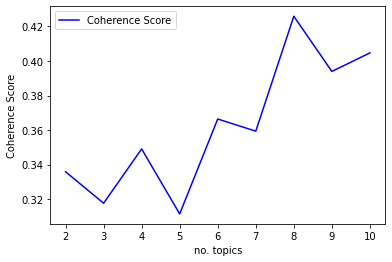

In [43]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values, 'b', label="Coherence Score")
plt.ylabel('Coherence Score')
plt.xlabel('no. topics')
plt.legend()
plt.show()

### (4) Optimal value and comparison

In [44]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [45]:
for idx in range(8):
    print("Topic #%s:" % idx, lda_model.print_topic(idx, 10))
print("=" * 20)

Topic #0: 0.014*"good" + 0.011*"chicken" + 0.011*"sauce" + 0.011*"pork" + 0.011*"noodle" + 0.010*"flavor" + 0.009*"beef" + 0.009*"food" + 0.009*"burger" + 0.007*"fried"
Topic #1: 0.010*"location" + 0.010*"bacon" + 0.006*"closing" + 0.005*"social" + 0.005*"customer" + 0.005*"wouldve" + 0.005*"said" + 0.004*"answer" + 0.004*"screen" + 0.004*"flower"
Topic #2: 0.028*"car" + 0.009*"brake" + 0.007*"team" + 0.005*"smell" + 0.005*"drove" + 0.005*"information" + 0.005*"milk" + 0.004*"problem" + 0.004*"found" + 0.004*"waste"
Topic #3: 0.008*"healthy" + 0.007*"board" + 0.006*"thou" + 0.006*"dollar" + 0.006*"low" + 0.006*"lie" + 0.006*"wear" + 0.005*"sister" + 0.004*"creative" + 0.004*"vegan"
Topic #4: 0.021*"food" + 0.019*"good" + 0.014*"place" + 0.014*"great" + 0.010*"chicken" + 0.010*"best" + 0.009*"service" + 0.009*"time" + 0.008*"delicious" + 0.008*"restaurant"
Topic #5: 0.013*"day" + 0.010*"room" + 0.009*"car" + 0.008*"work" + 0.008*"nail" + 0.006*"class" + 0.005*"would" + 0.005*"company" +

I can see that Topic #0 contains food and intuitively it can be view as the food topic, which is also included in the clusters in IC5.
Also, Topic #4 is quite similar with the "feedback" cluster in IC5, since "good", "great", "service" and "delicious" are involved in this cluster. However, there are also different topics by these two methods. For example, Topic #3 could be the class of category of food, which does not appear in the clusters in IC5. The same happen to Topic #6, which is possibly the class of drink (coffee). I think LDA is more effective in revealing the underlying topics of the studied data, since each document could involves different topics. Under such a context, LDA based on likelihood of topics are more general than clustering.

### (5) Briefly discuss the similarity and differences between text clustering and topic modeling.

Firslty, both topic modeling and text clustering are unsupervised learning algorithms, where we need to decide a parameter K that represents the number of topics. However, topic modeling such as LDA assigns a document to a mixture of topics and calculates the probability of which topic the document belongs to. On the other side, text clustering partitions the N documents in K disjoint clusters. 